In [1]:
from result_analysis import show_all_metrics_pred, show_all_metrics_fair, show_metric_aggregated
from result_analysis import create_trade_off_gif
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
algorithms = ['PL', 'STC', 'CC', 'HLNC', 'OBNC', 'BE']

experiments = ['phishing_having_IP_Address', 'bank_housing', 'monks1_attr3', 'biodeg_V25', 
                'credit_A1', 'sick_referral_source_other', 'vote_immigration', 'ads_local', 'churn_voice_mail_plan']

noise_types = ['random', 'flip', 'bias', 'balanced_bias']

In [3]:
pred_metrics = ['accuracy', 'roc_auc']

fair_metrics = [
        'auc_difference',
        'equal_opportunity_difference', 
        'predictive_equality_difference',
        'demographic_parity_difference',
        'equalized_odds_difference']

metrics = pred_metrics + fair_metrics

In [4]:
runs = {}
for noise_type in noise_types:
    runs[noise_type] = {}
    for exp in experiments:
        for alg in algorithms:
            runs[noise_type][f'{exp}_{alg}'] = pd.read_csv(f'../noiseinjection_results/{noise_type}/{exp}_{alg}.csv').fillna(0)

# Random Noise

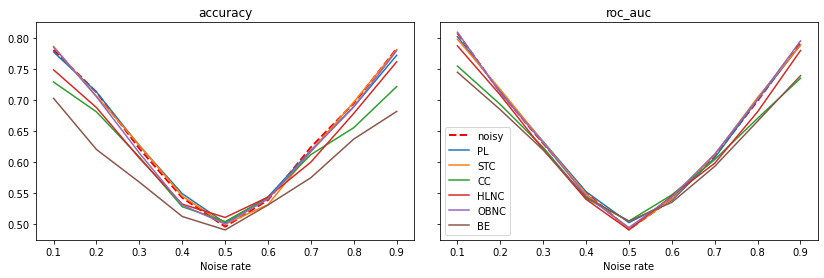

In [5]:
show_all_metrics_pred('random', 'noisy', algorithms, experiments, runs)

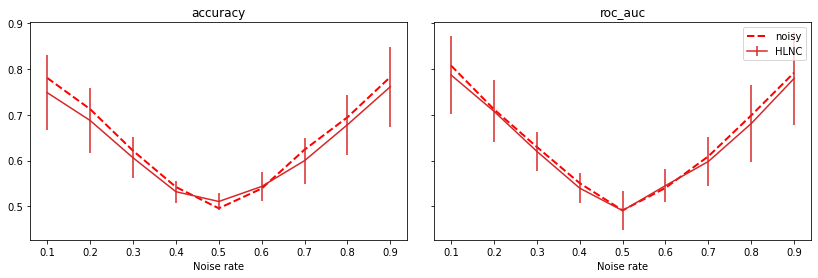

In [6]:
for alg in ['HLNC']:
    show_all_metrics_pred('random', 'noisy', [alg], experiments, runs)

# Label flipping

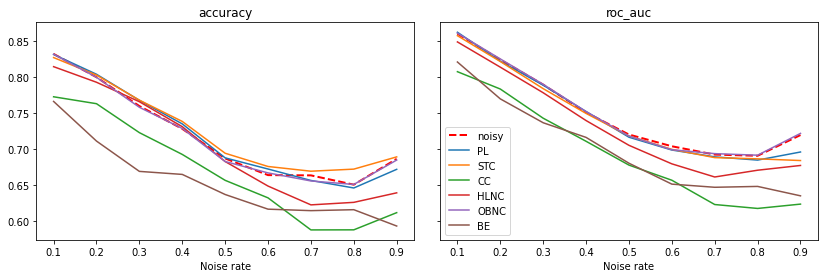

In [7]:
show_all_metrics_pred('flip', 'noisy', algorithms, experiments, runs)

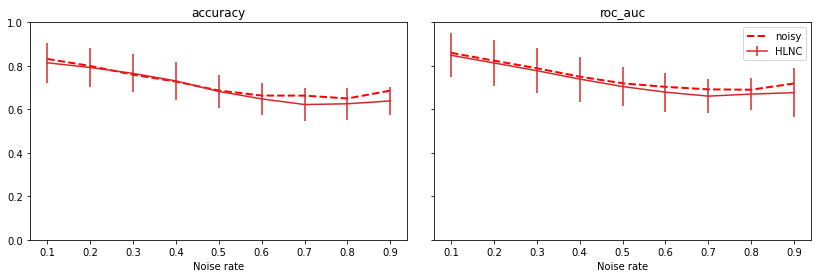

In [8]:
for alg in ['HLNC']:
    show_all_metrics_pred('flip', 'noisy', [alg], experiments, runs, True)

# Positive Bias

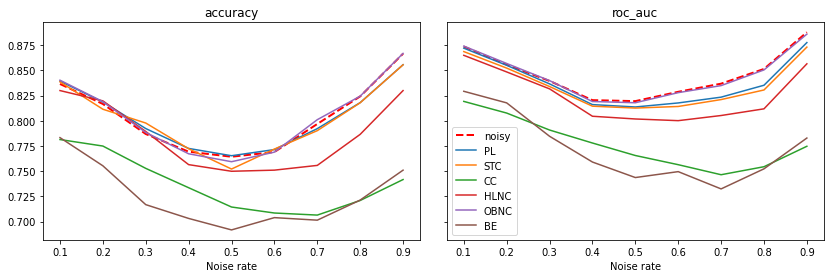

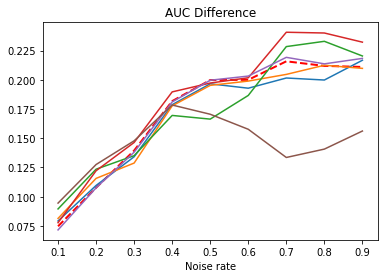

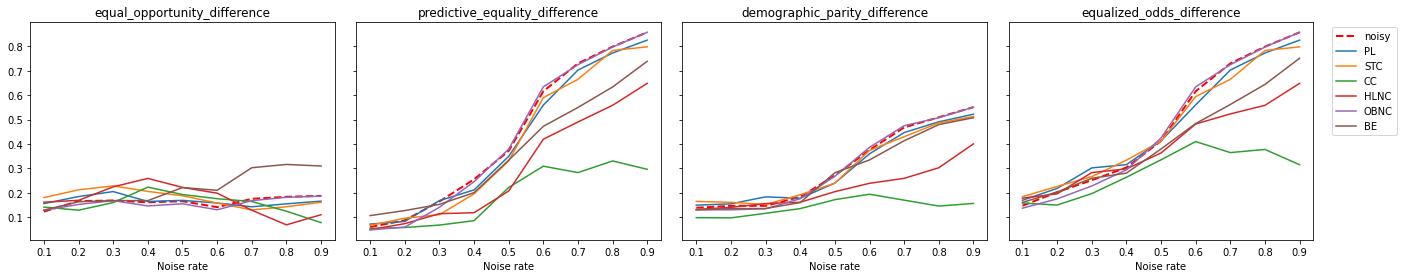

In [9]:
show_all_metrics_pred('bias', 'noisy', algorithms, experiments, runs)
show_metric_aggregated('bias', 'noisy', 'auc_difference', plt.gca(), f'AUC Difference', algorithms, experiments, runs)
show_all_metrics_fair('bias', 'noisy', algorithms, experiments, runs)

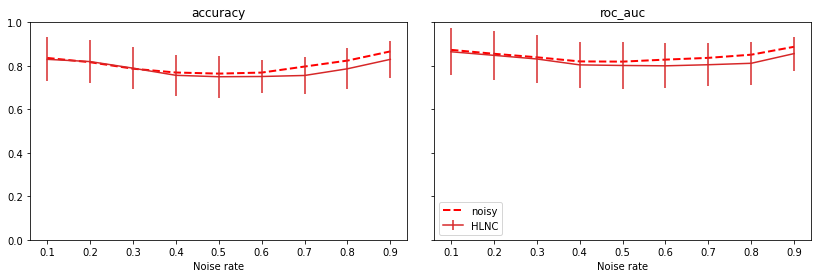

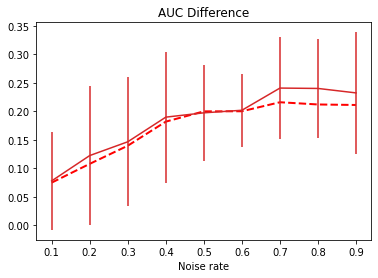

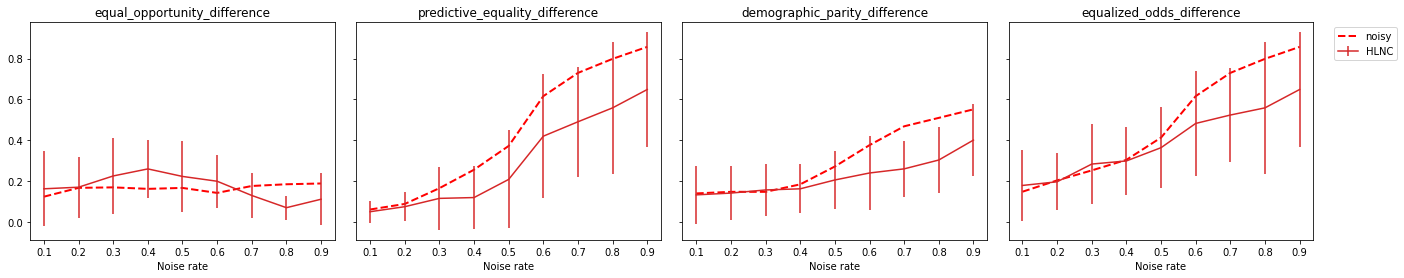

In [10]:
for alg in ['HLNC']:
    show_all_metrics_pred('bias', 'noisy', [alg], experiments, runs, True)
    show_metric_aggregated('bias', 'noisy', 'auc_difference', plt.gca(), f'AUC Difference', [alg], experiments, runs)
show_all_metrics_fair('bias', 'noisy', [alg], experiments, runs)

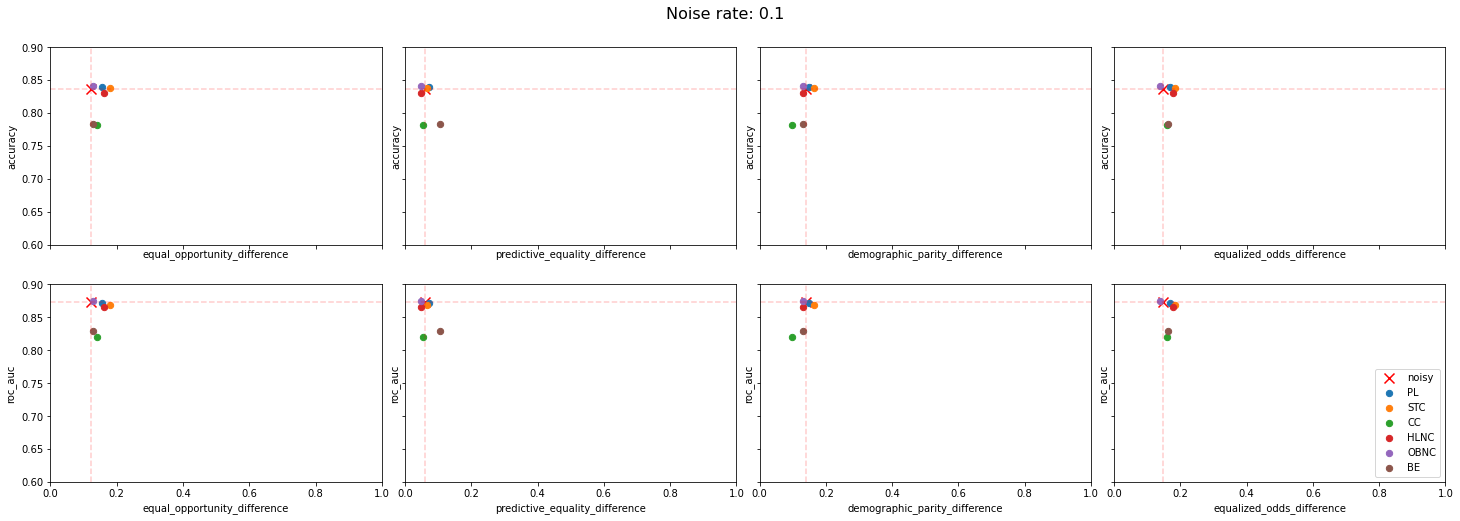

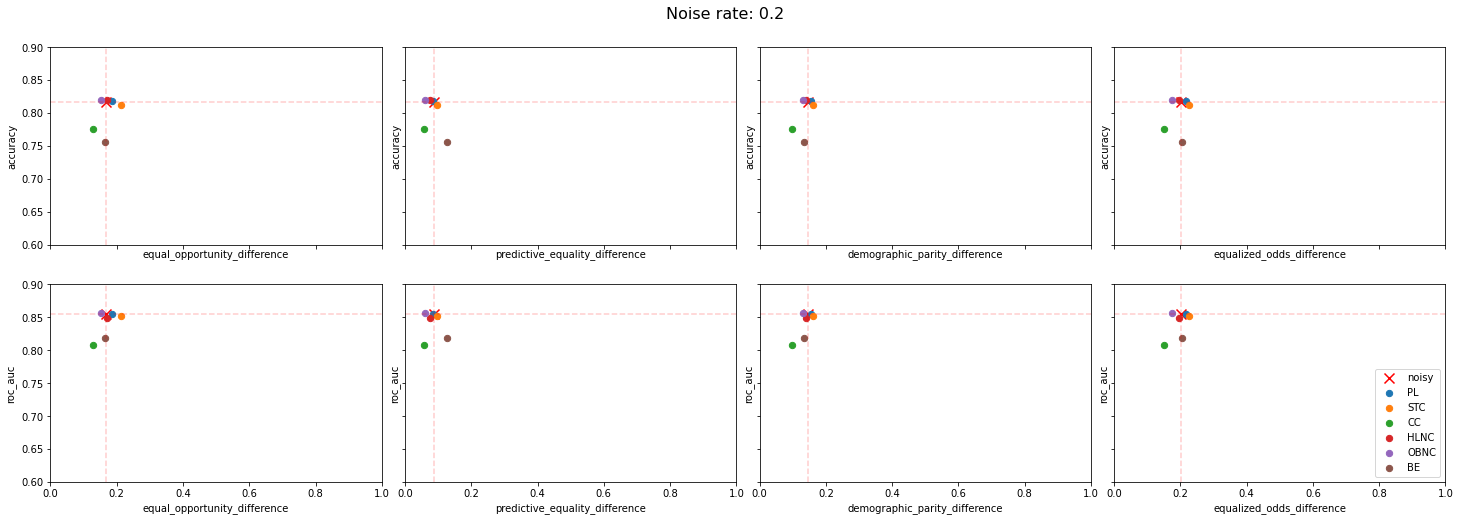

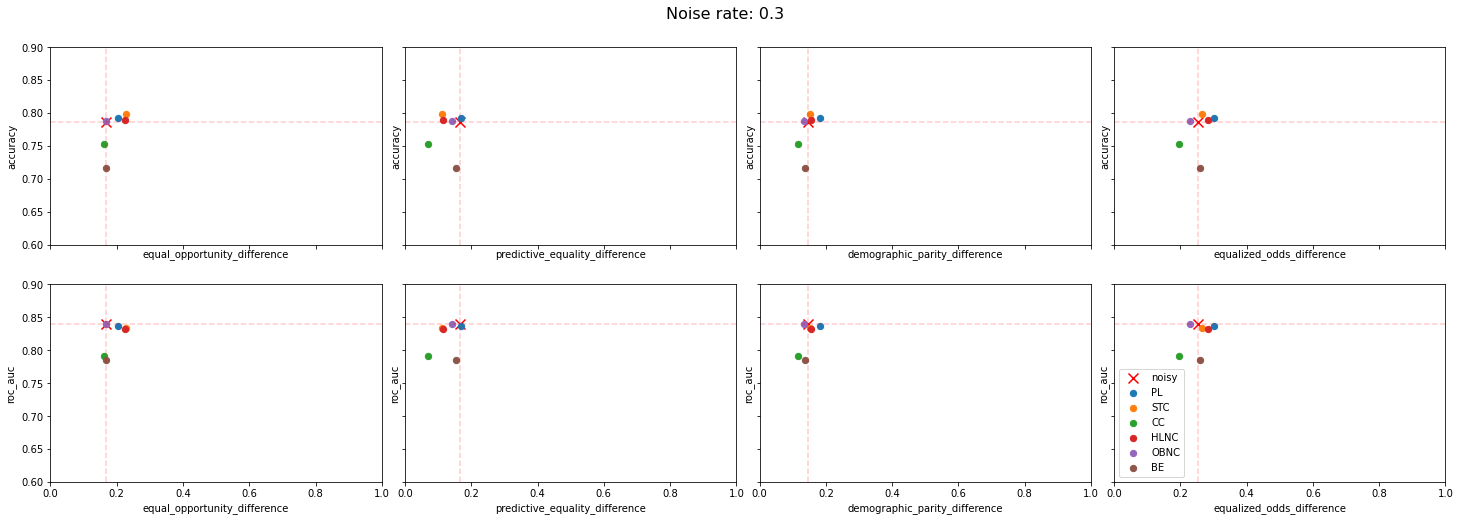

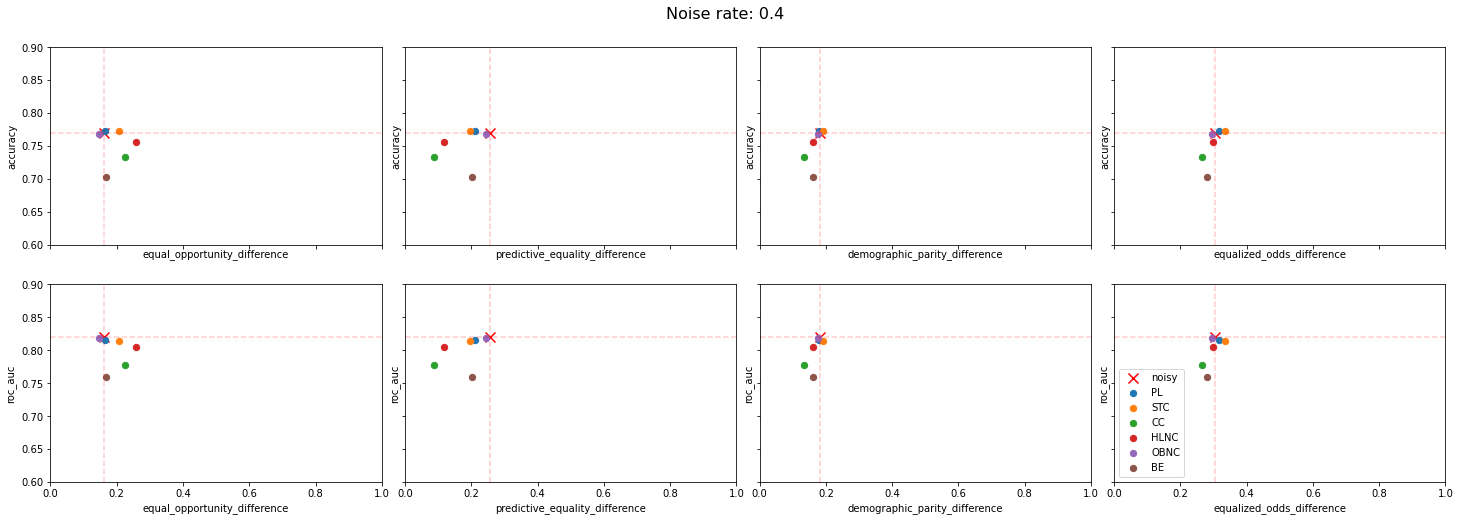

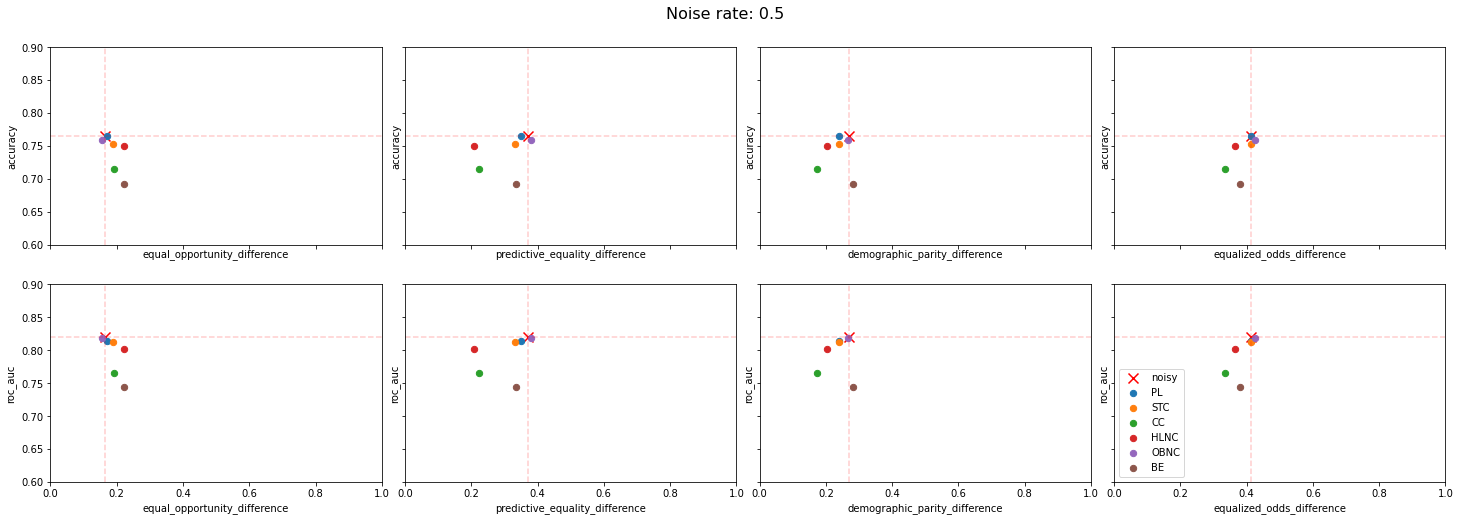

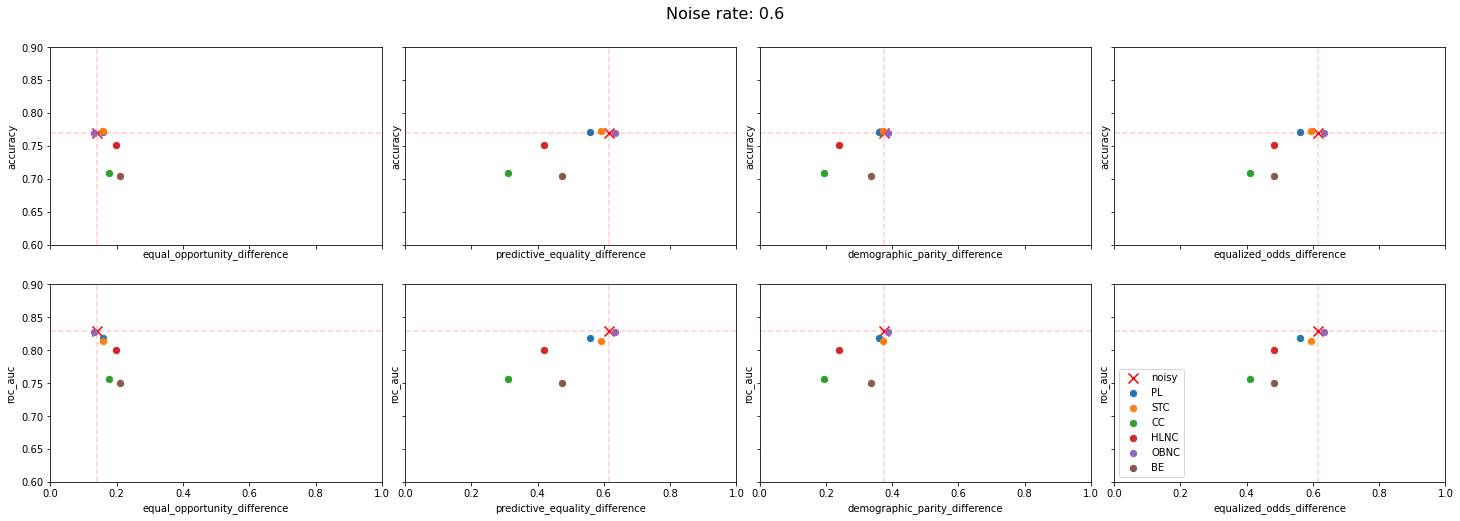

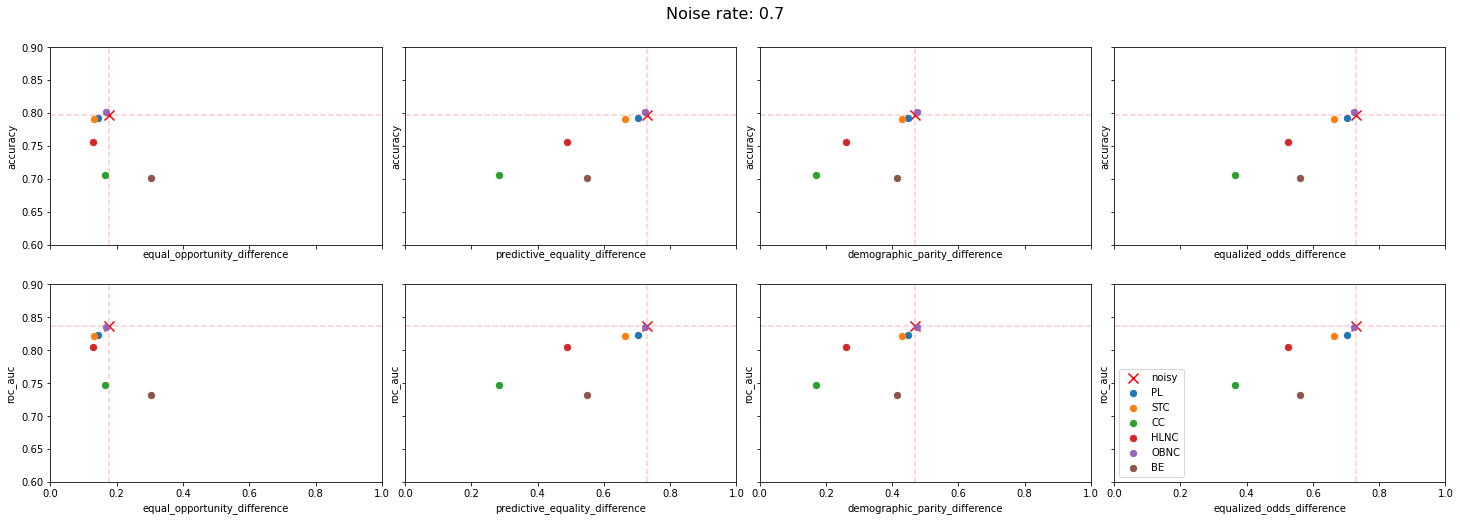

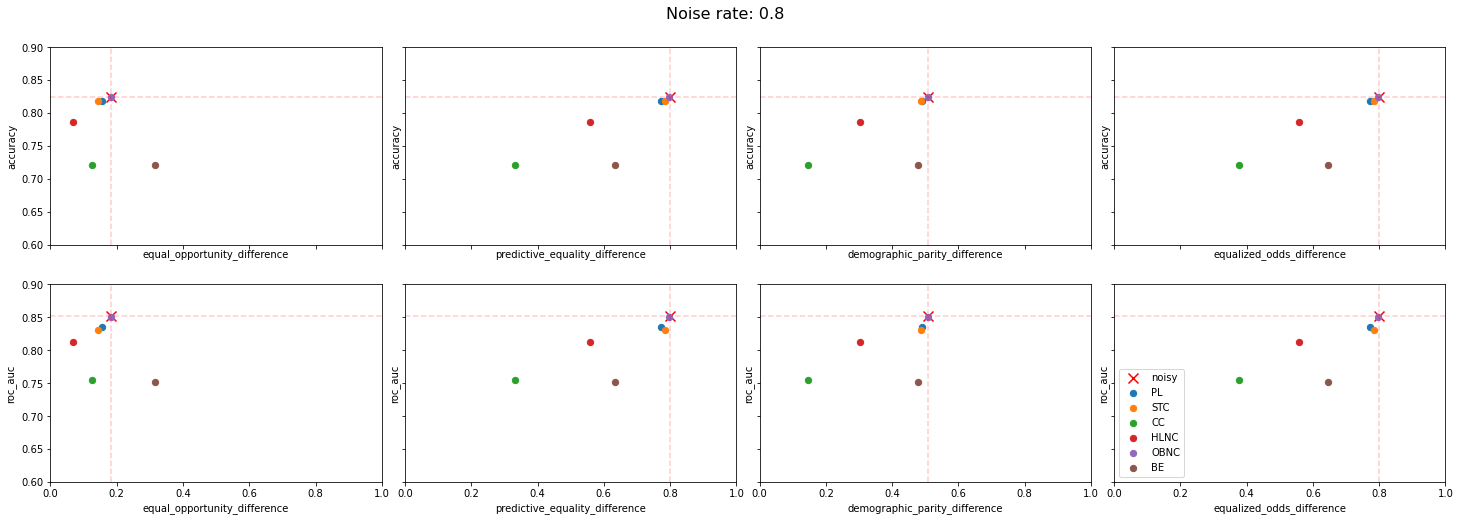

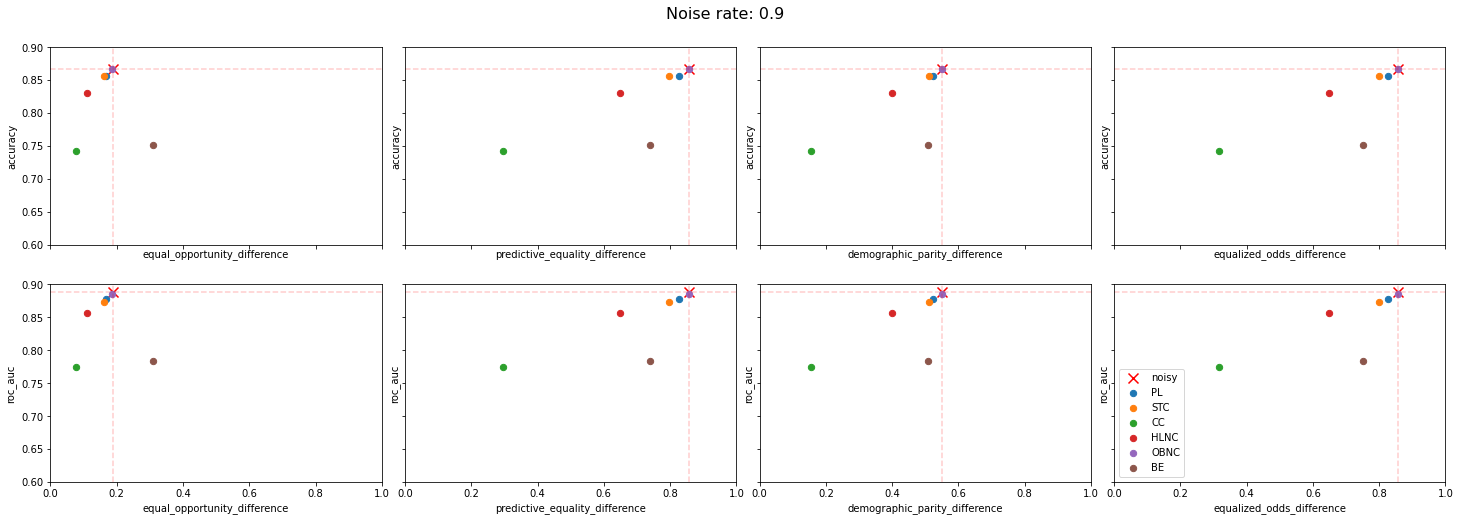

In [11]:
create_trade_off_gif('bias', 'noisy', algorithms, experiments, runs, xlimit=[0, 1], ylimit=[0.6, 0.9])

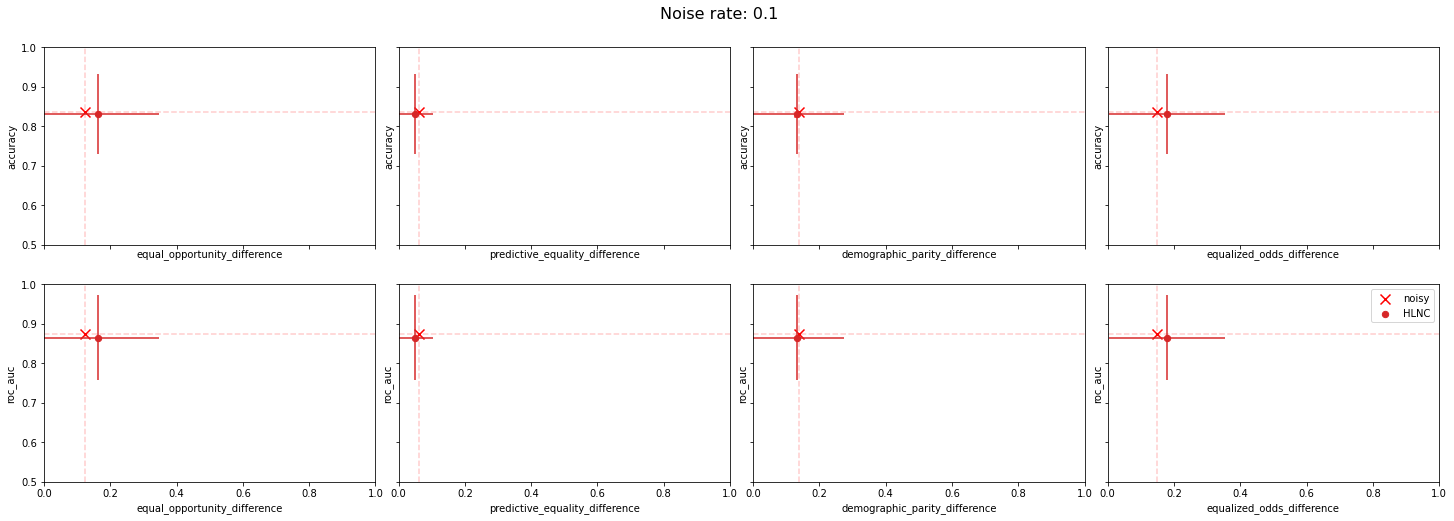

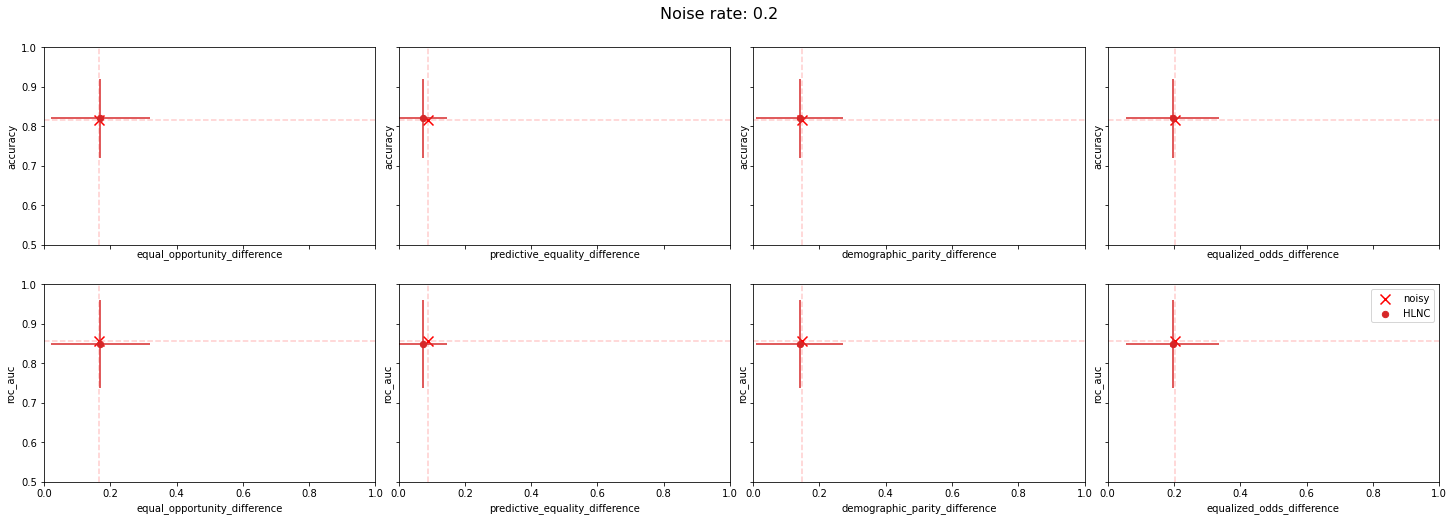

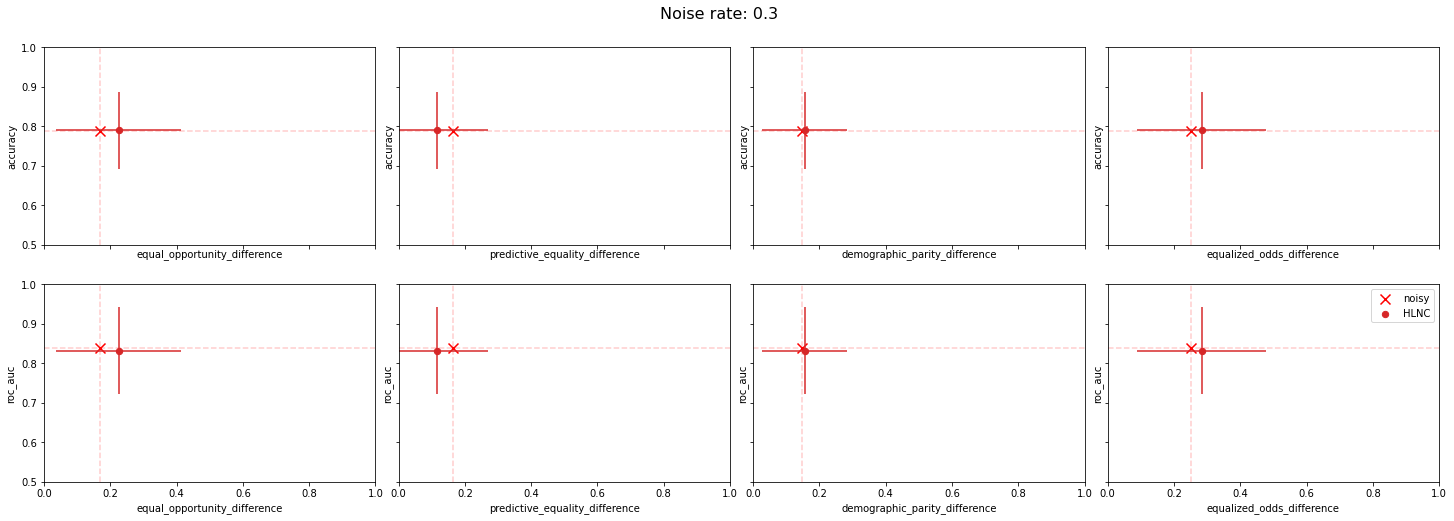

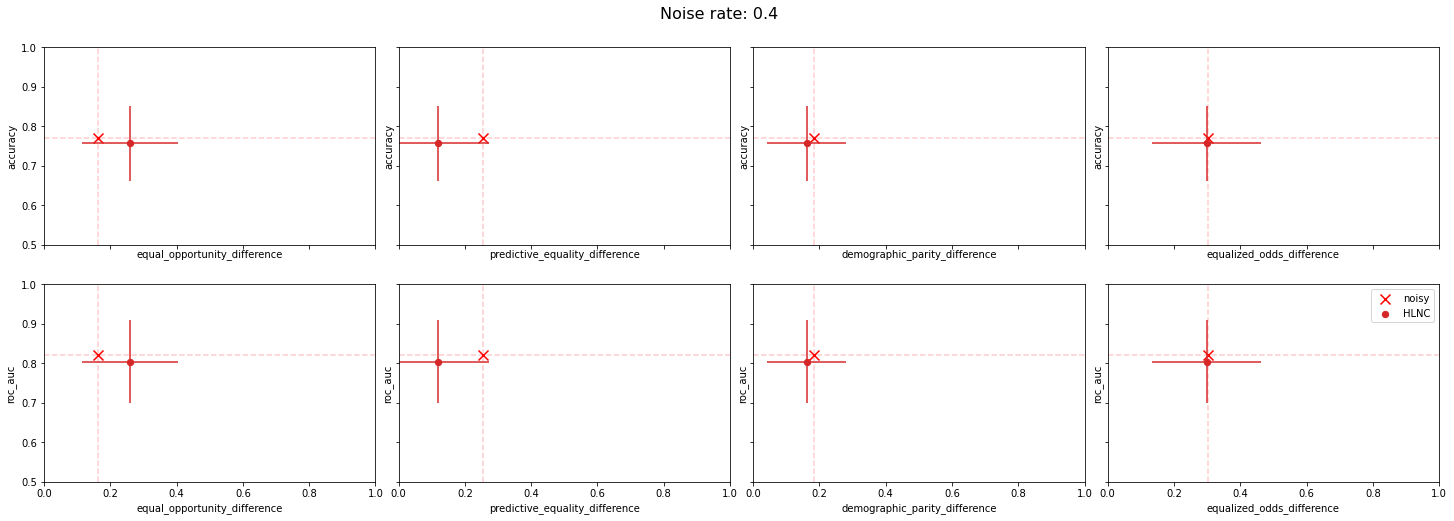

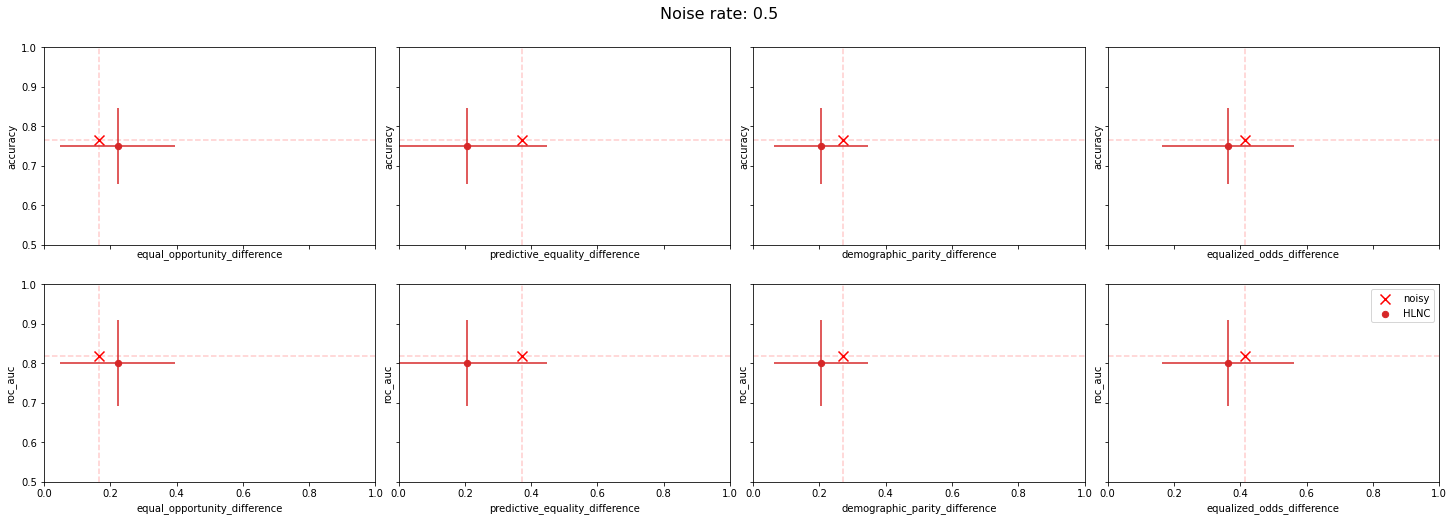

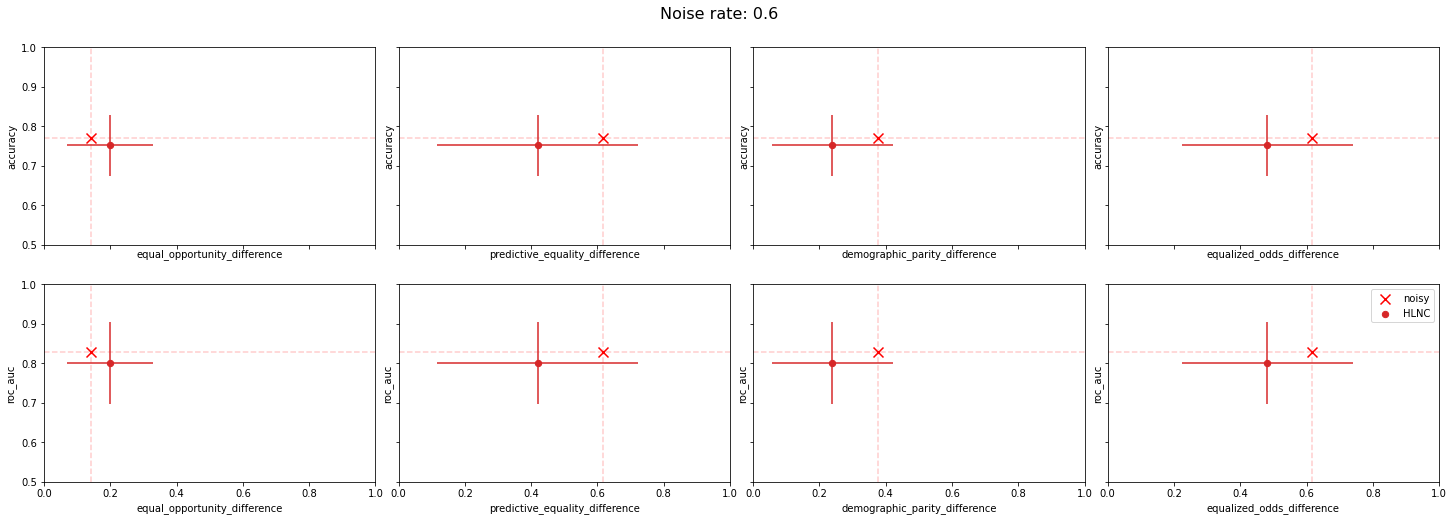

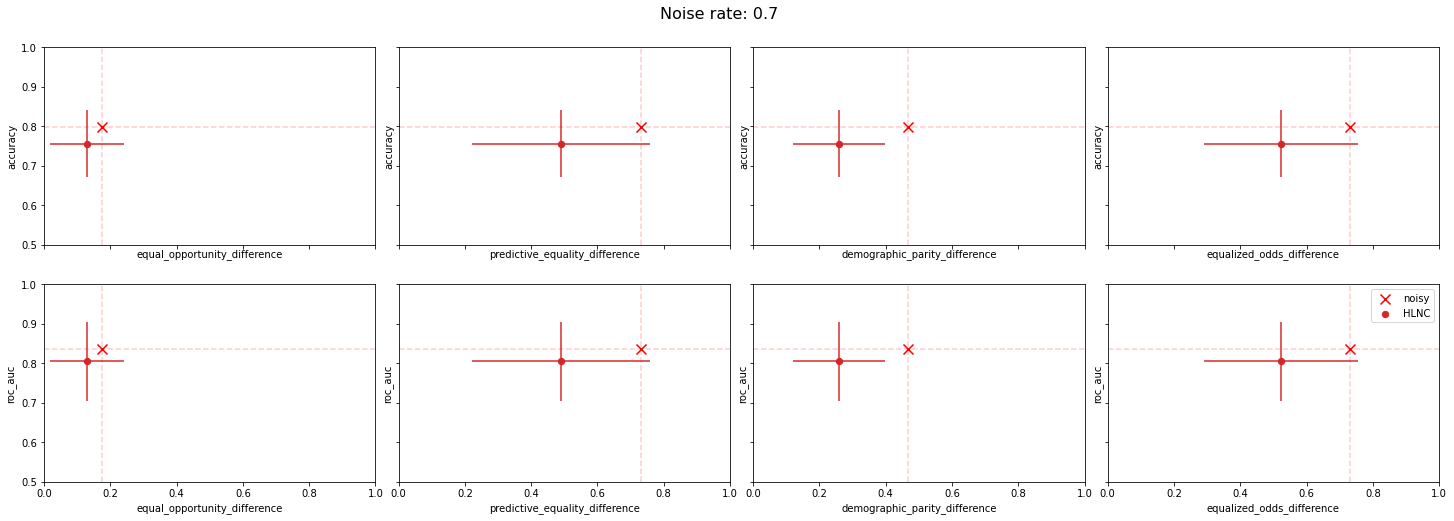

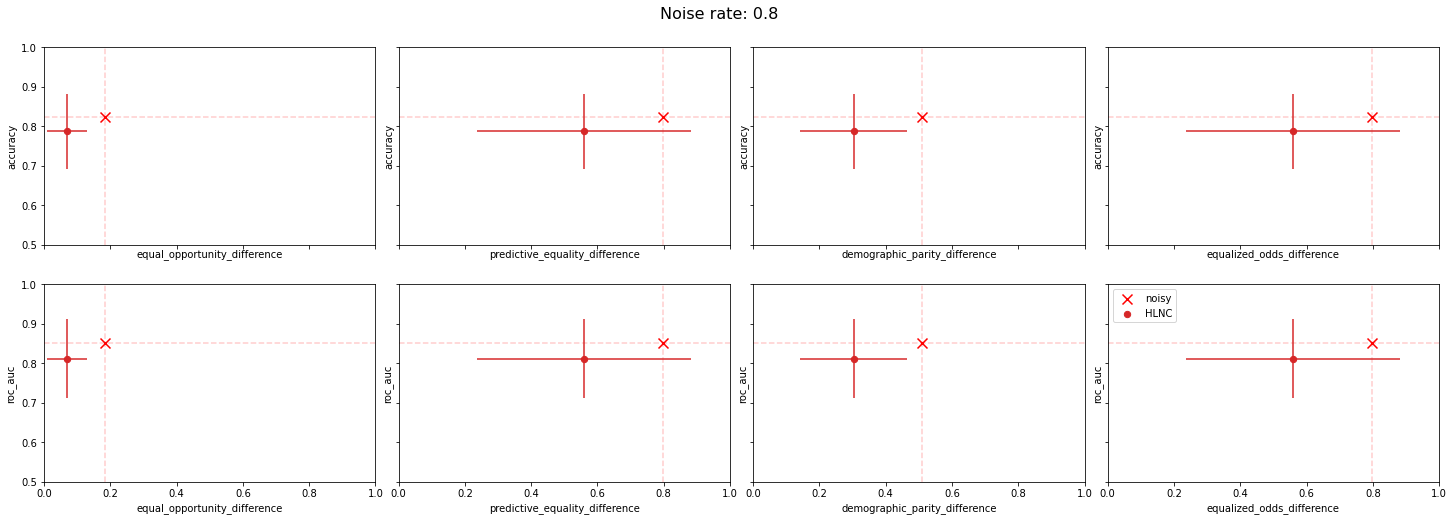

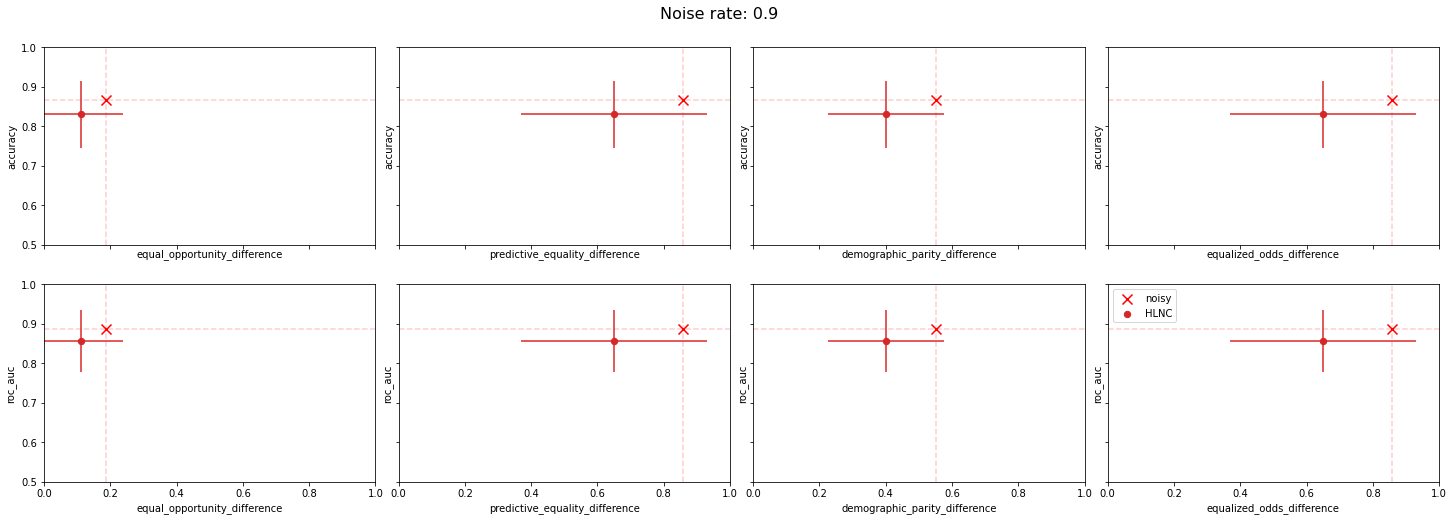

In [12]:
create_trade_off_gif('bias', 'noisy', ['HLNC'], experiments, runs, xlimit=[0, 1], ylimit=[0.5, 1])

# Balanced Bias

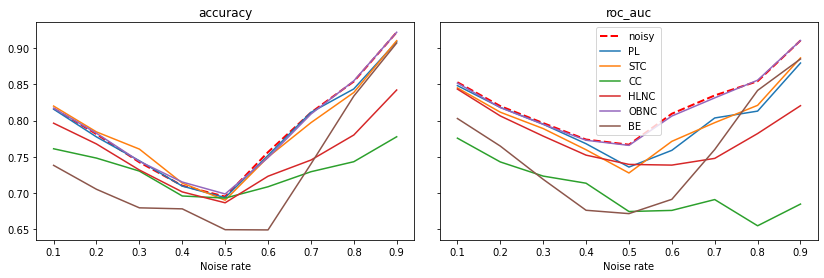

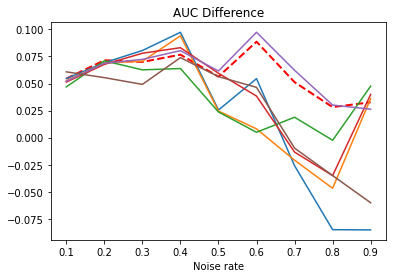

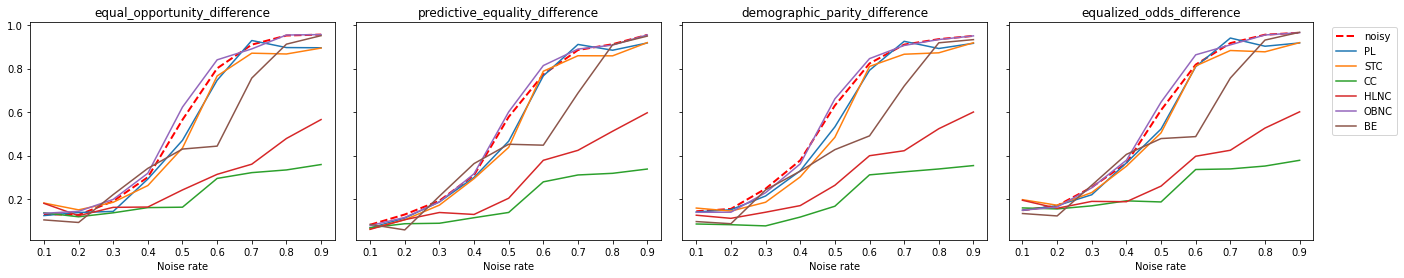

In [13]:
show_all_metrics_pred('balanced_bias', 'noisy', algorithms, experiments, runs)
show_metric_aggregated('balanced_bias', 'noisy', 'auc_difference', plt.gca(), f'AUC Difference', algorithms, experiments, runs)
show_all_metrics_fair('balanced_bias', 'noisy', algorithms, experiments, runs)

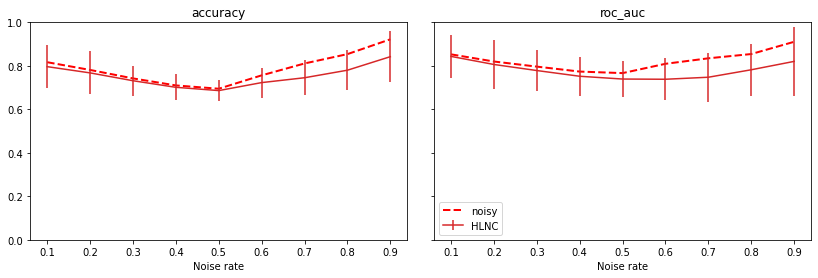

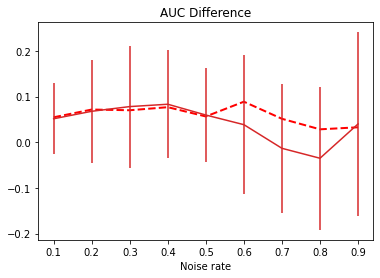

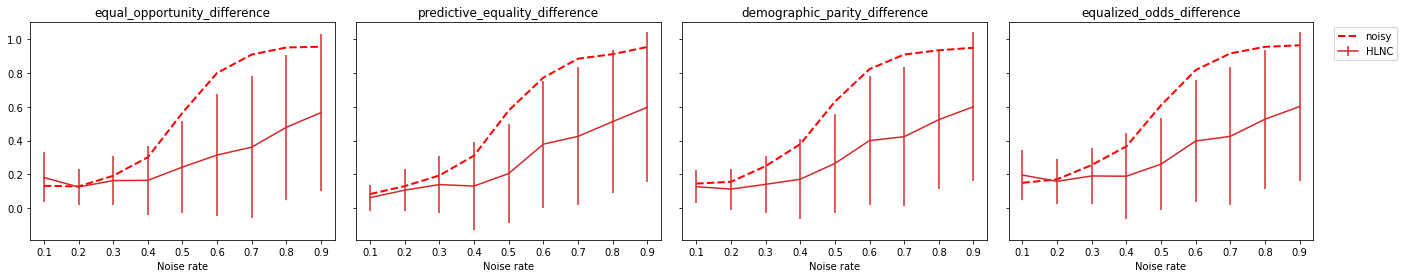

In [14]:
for alg in ['HLNC']:
    show_all_metrics_pred('balanced_bias', 'noisy', [alg], experiments, runs, True)
    show_metric_aggregated('balanced_bias', 'noisy', 'auc_difference', plt.gca(), f'AUC Difference', [alg], experiments, runs)
    show_all_metrics_fair('balanced_bias', 'noisy', [alg], experiments, runs)

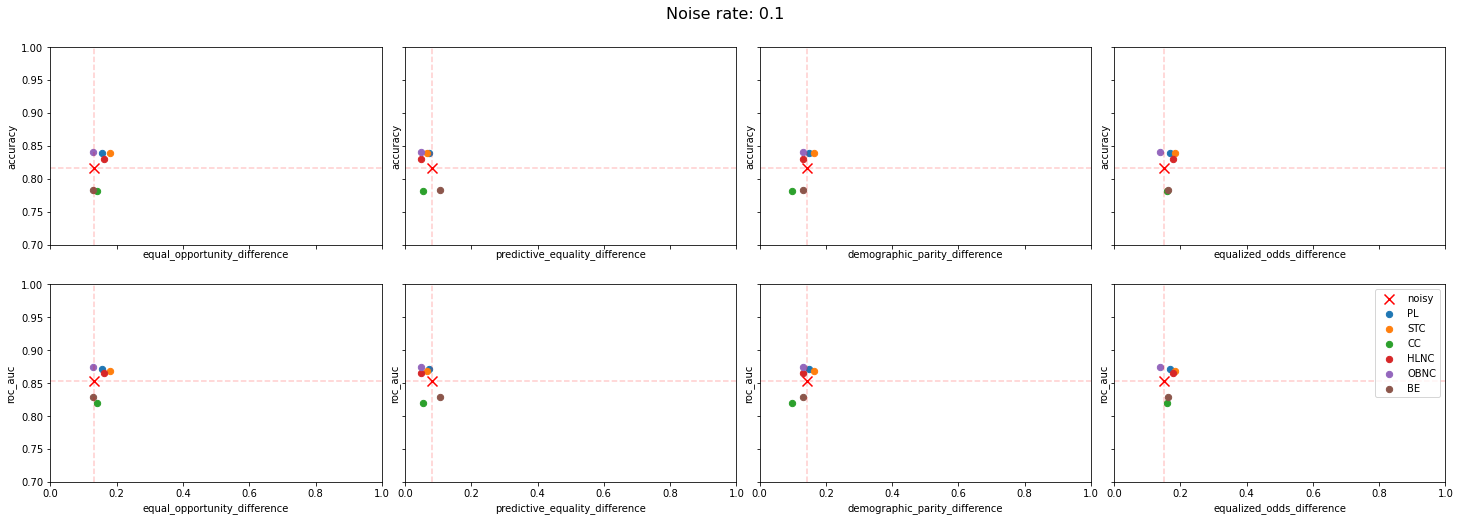

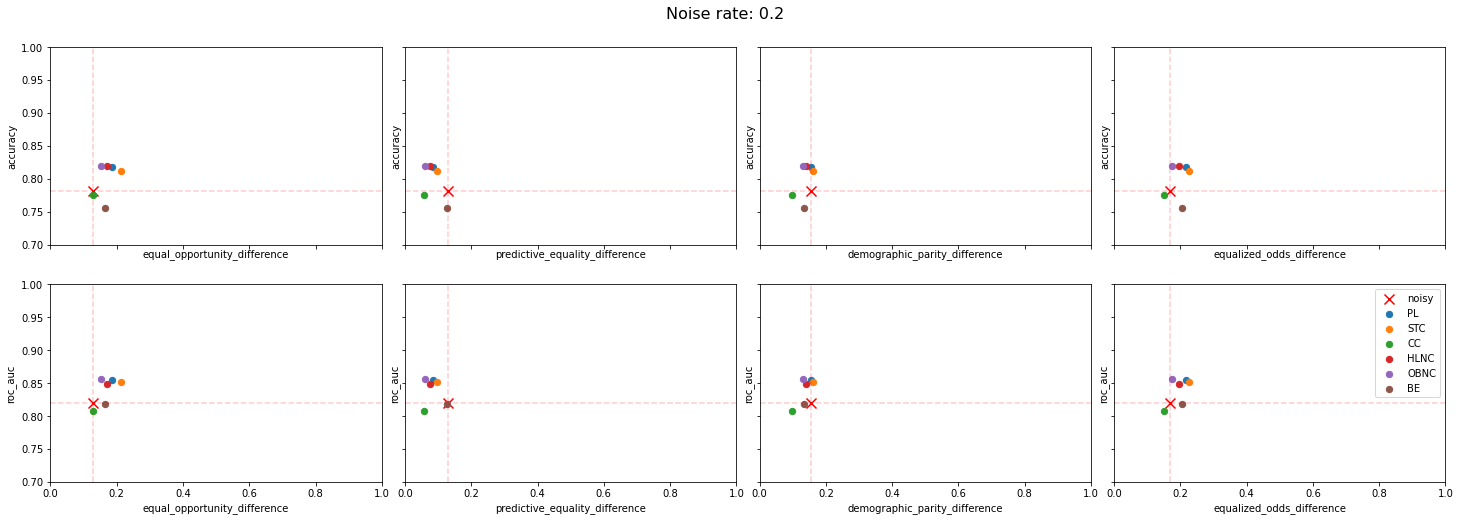

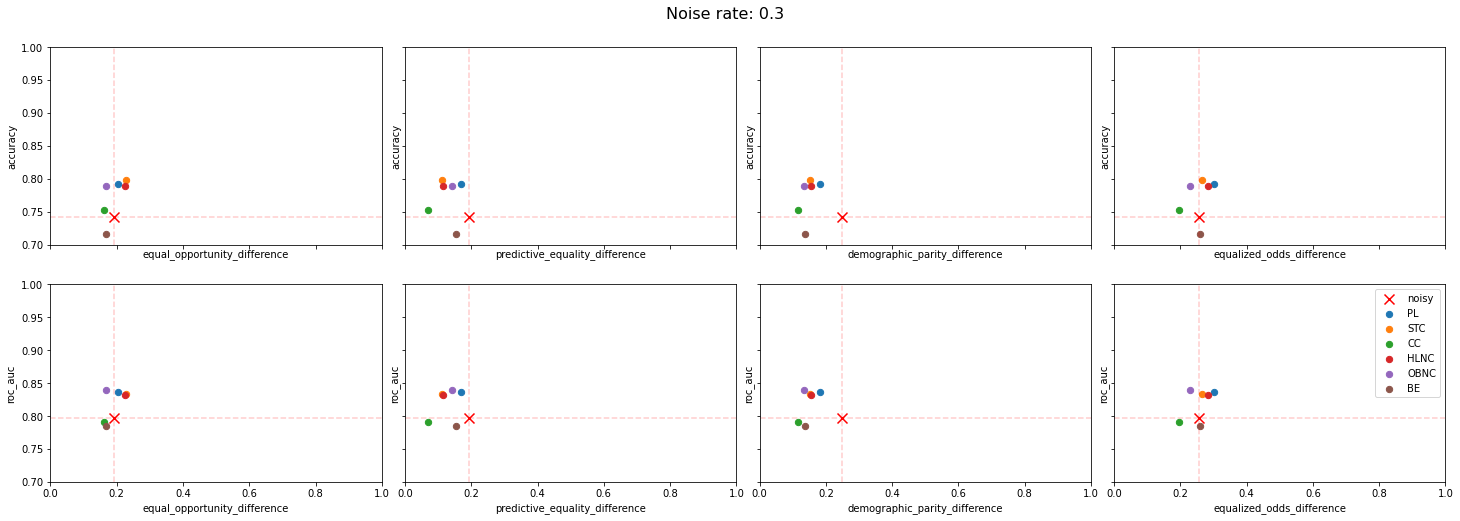

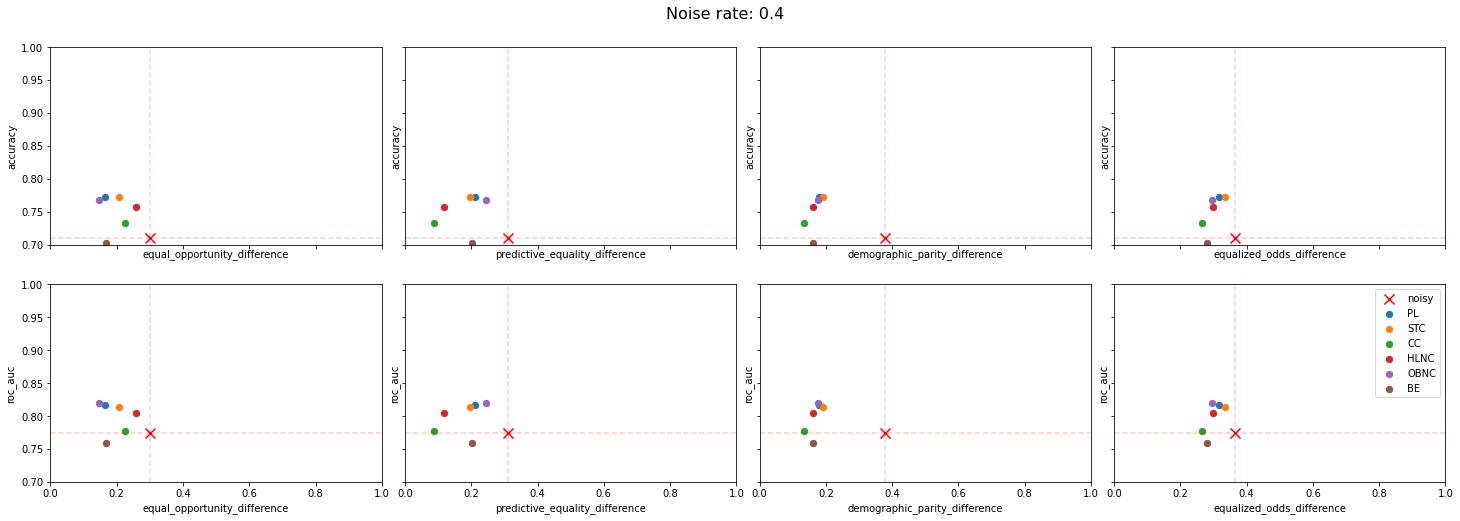

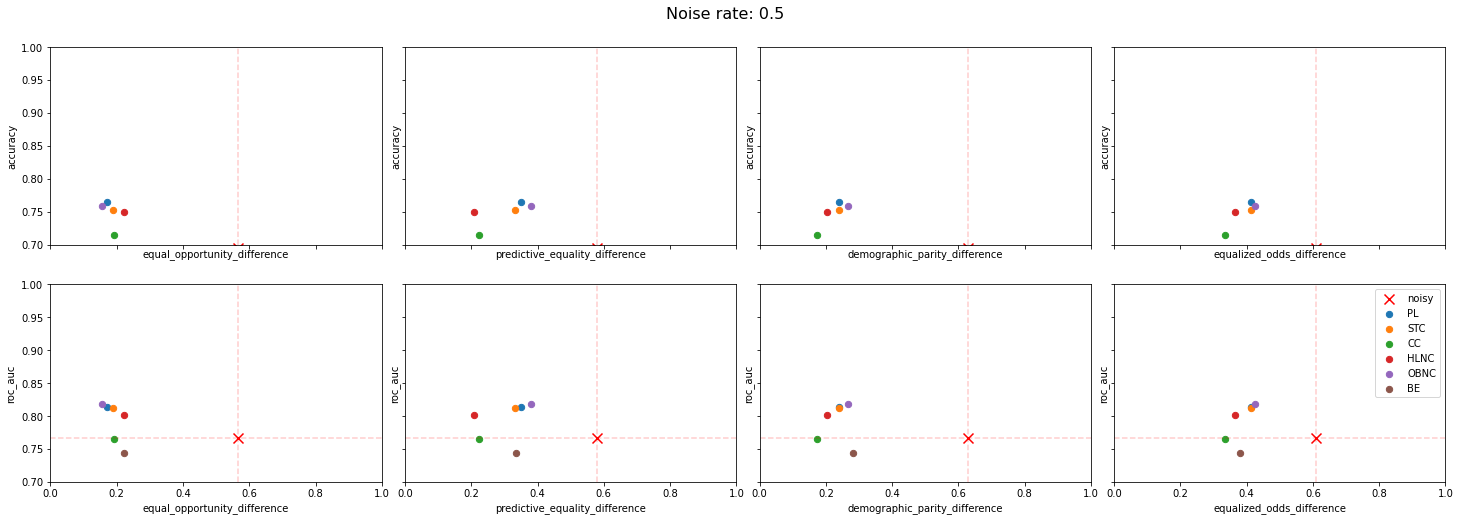

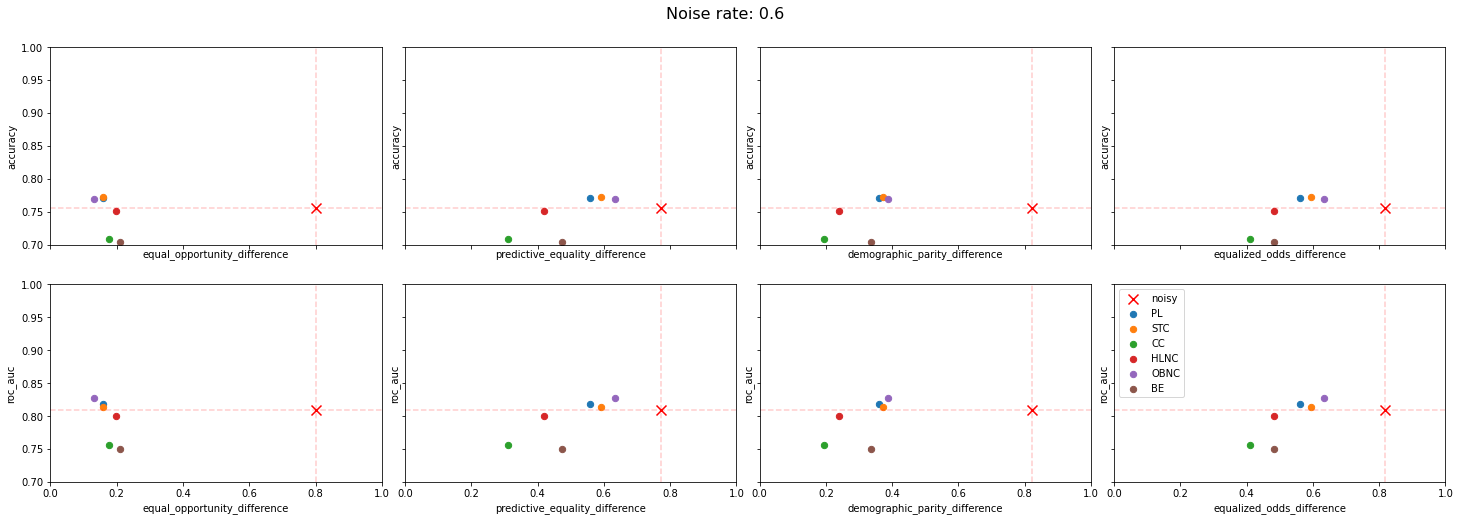

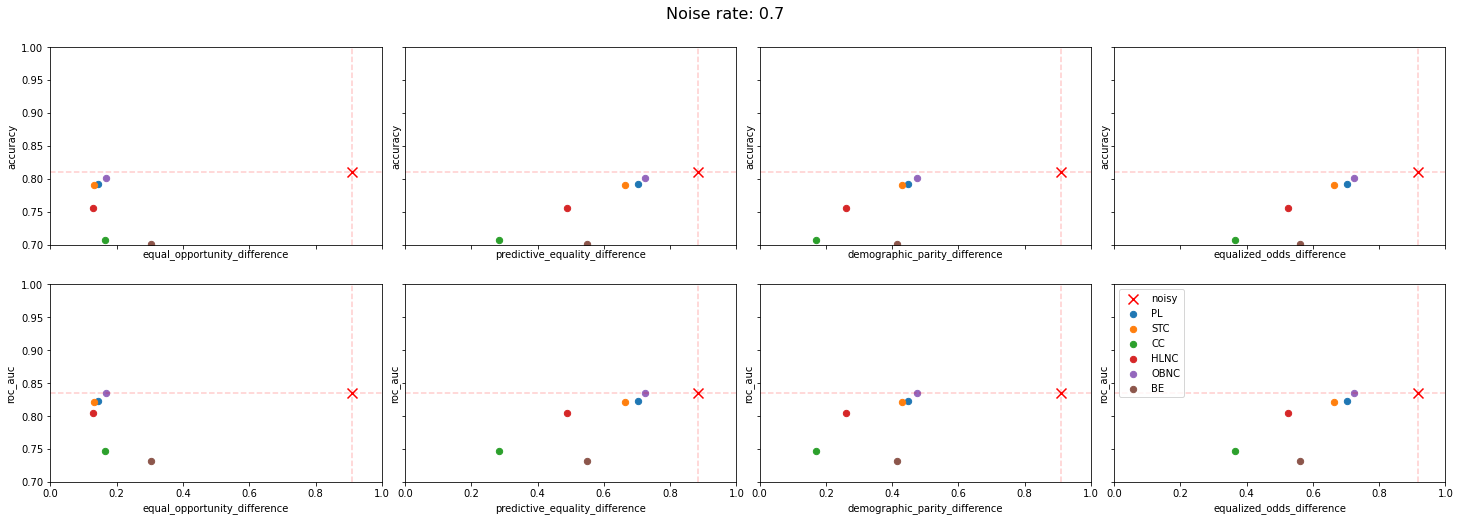

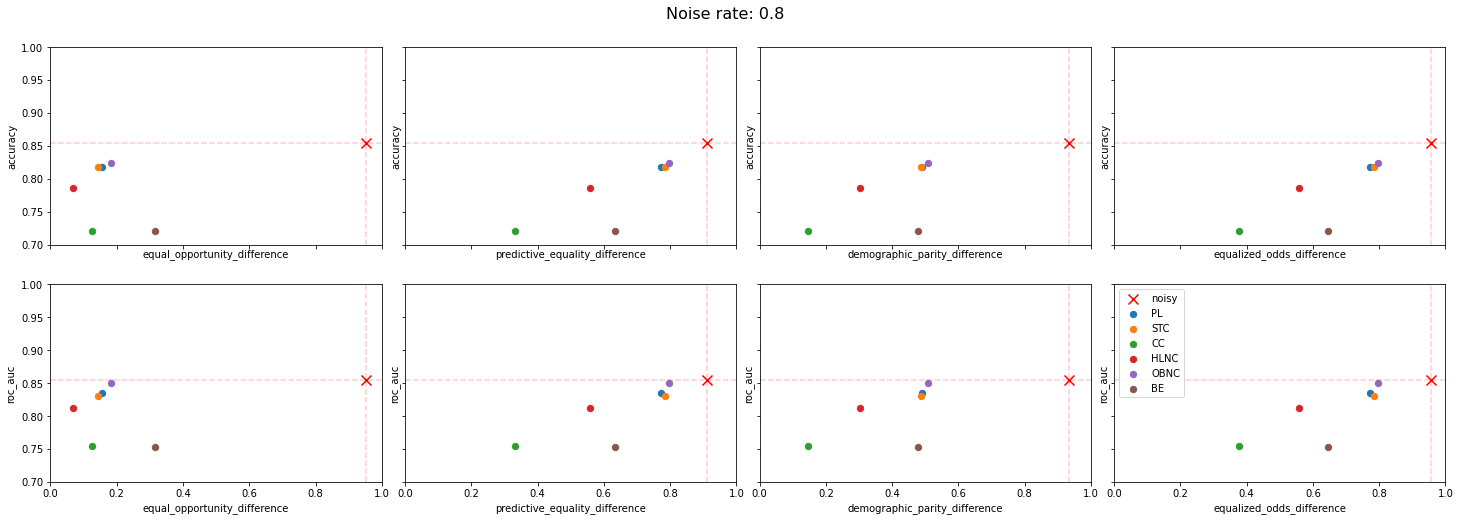

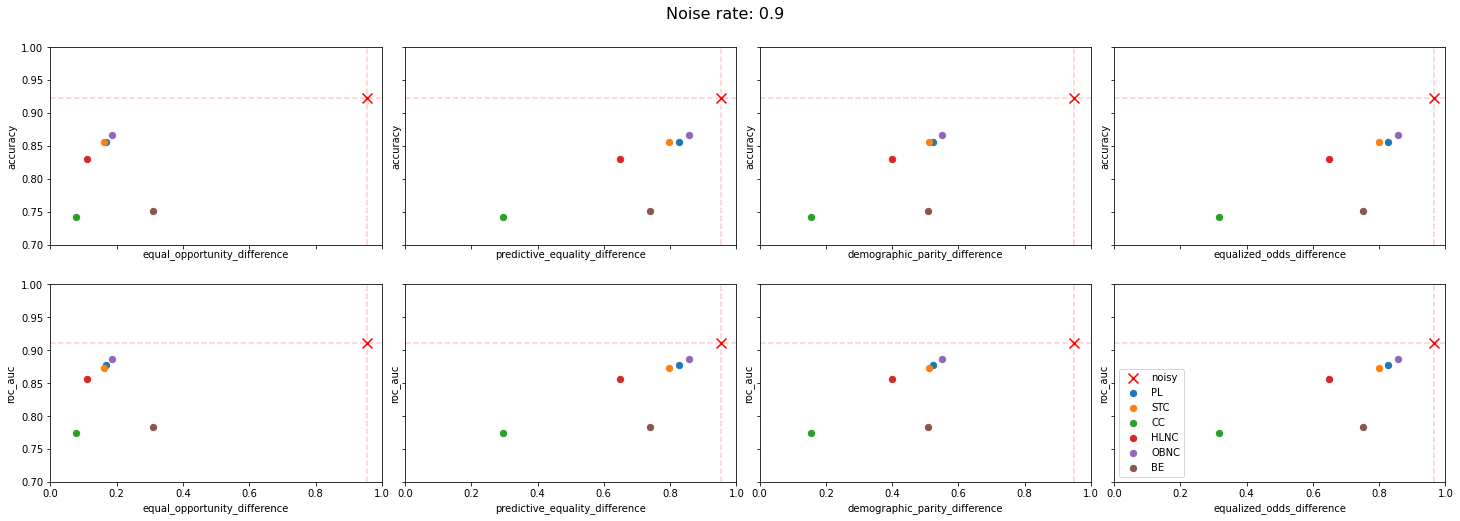

In [15]:
create_trade_off_gif('balanced_bias', 'noisy', algorithms, experiments, runs, xlimit=(0, 1), ylimit=(0.7, 1))

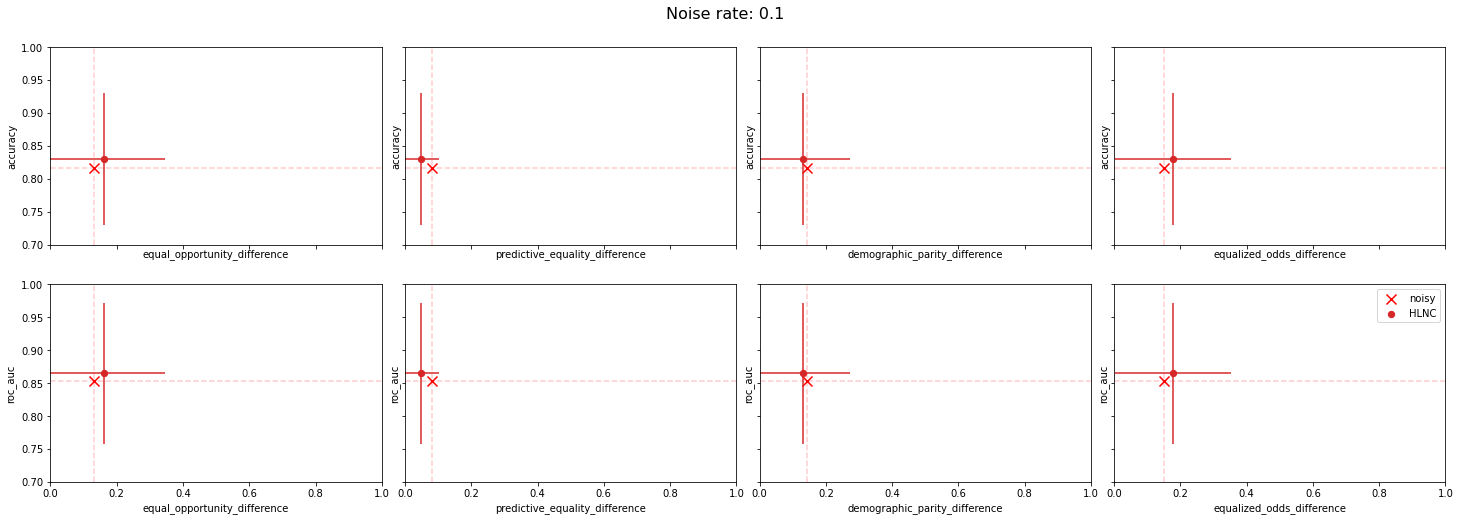

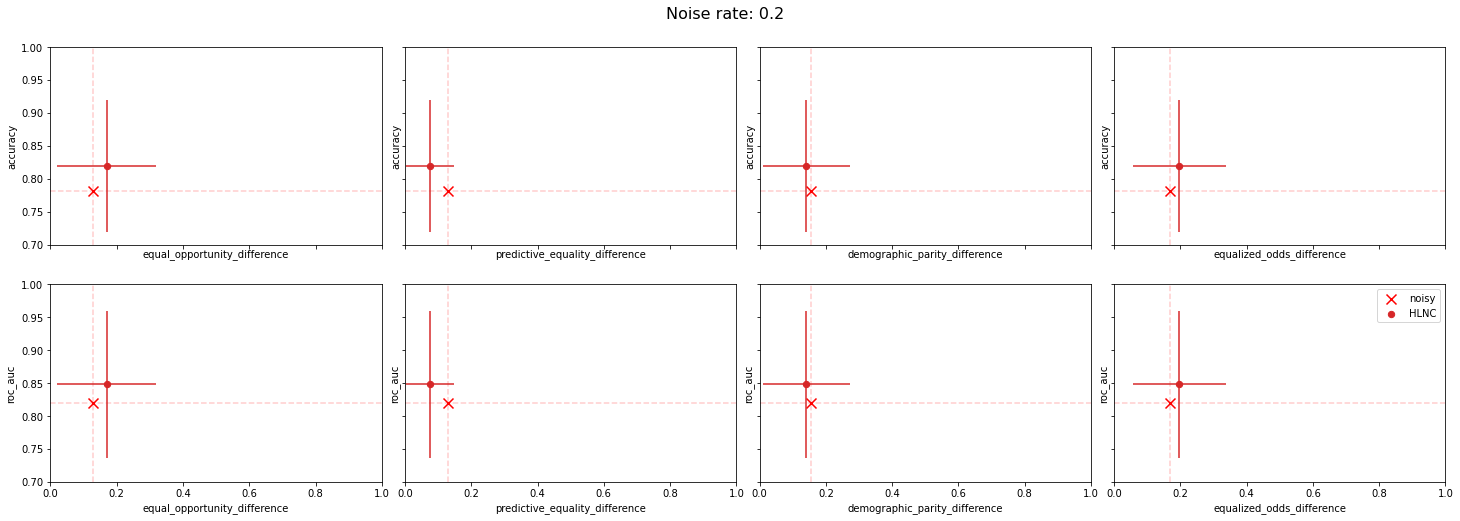

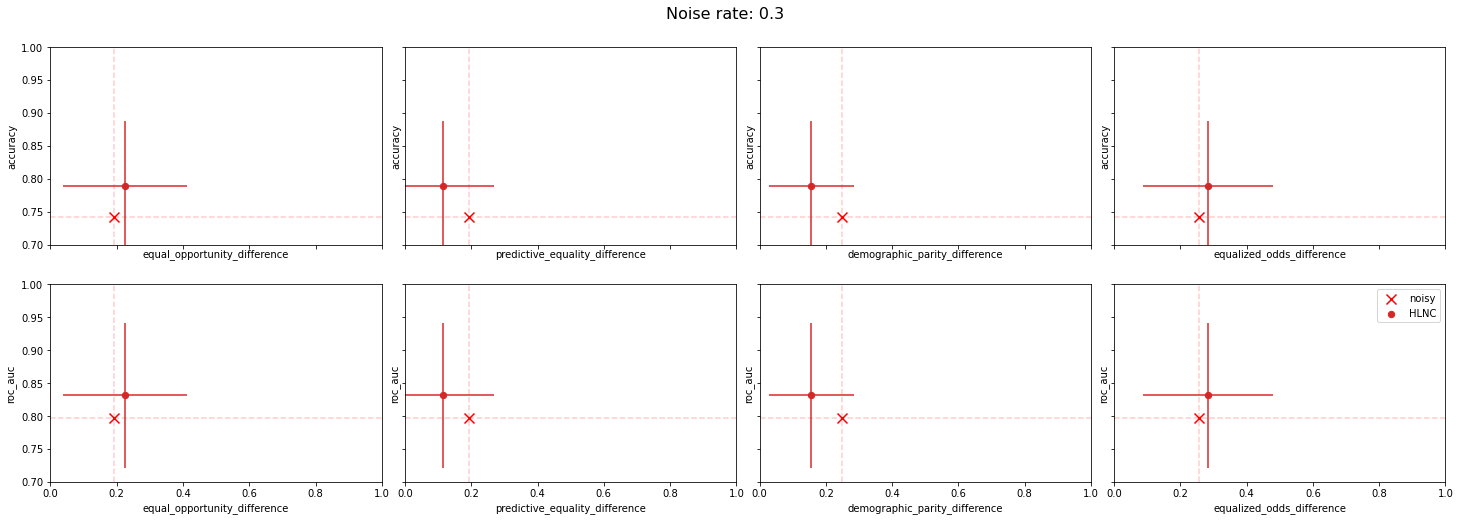

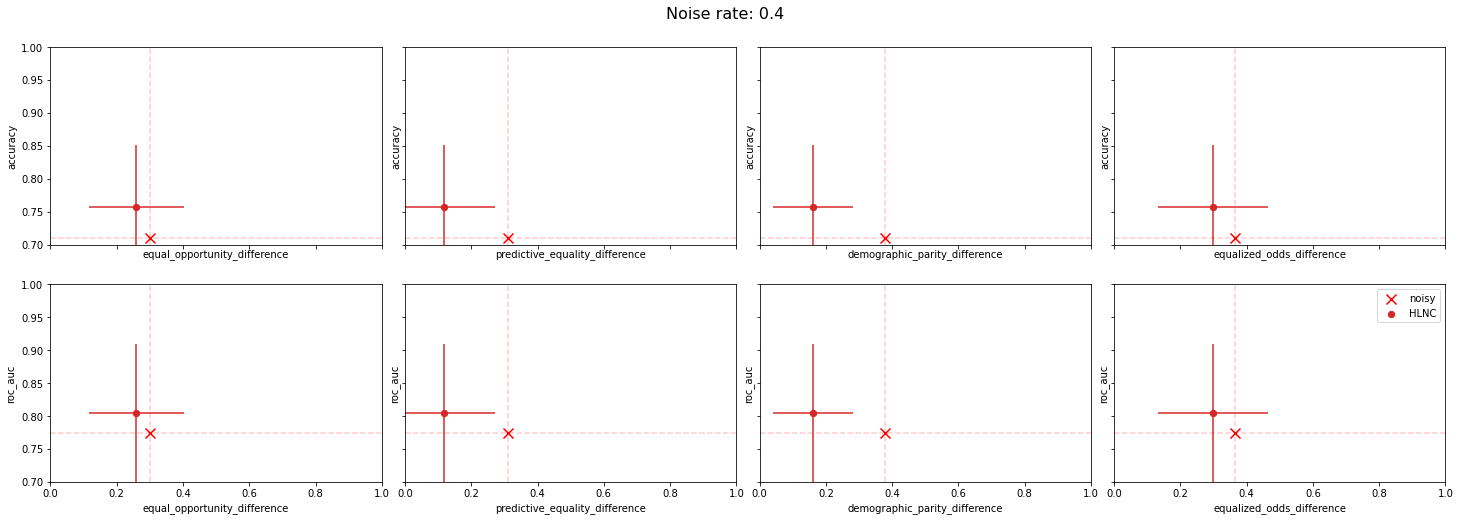

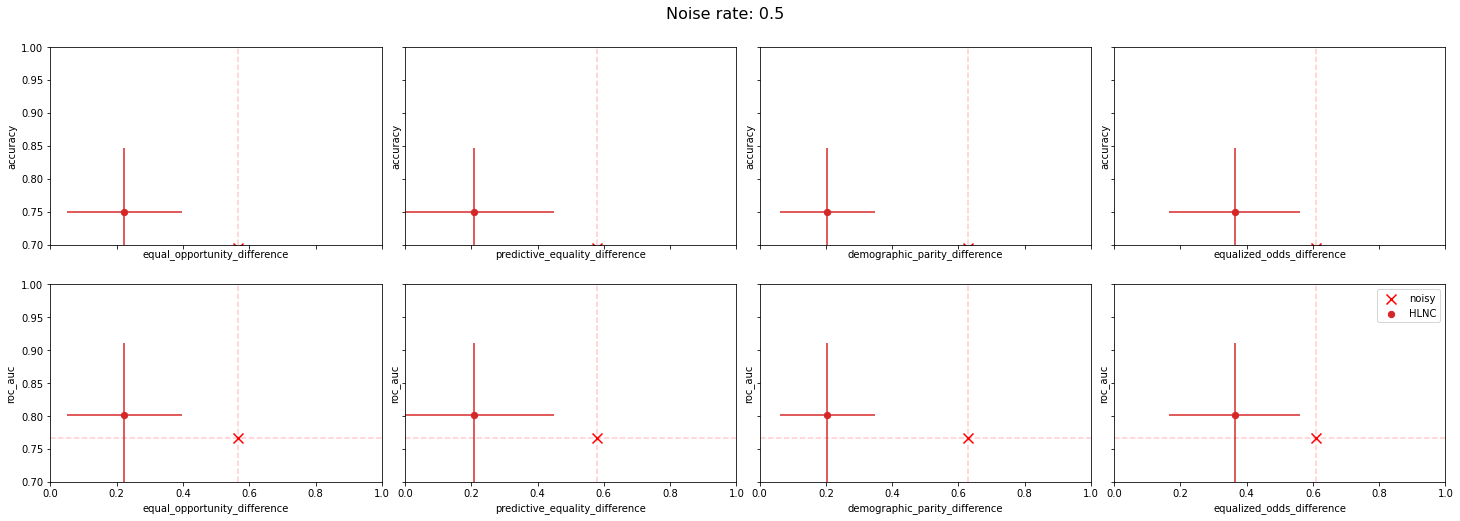

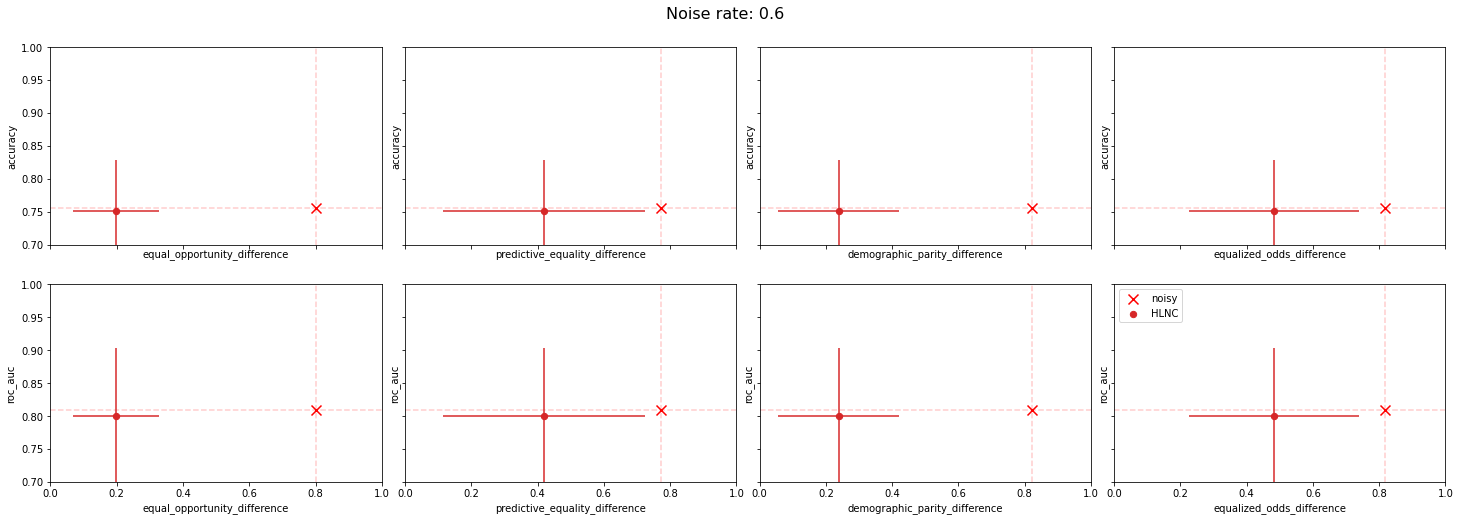

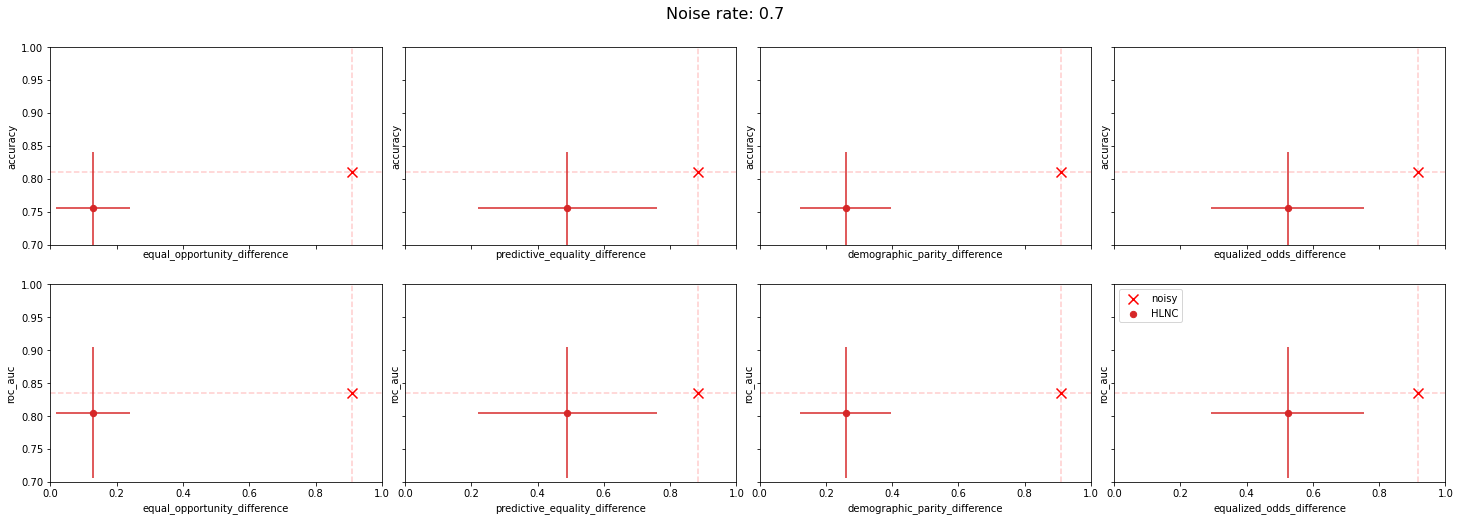

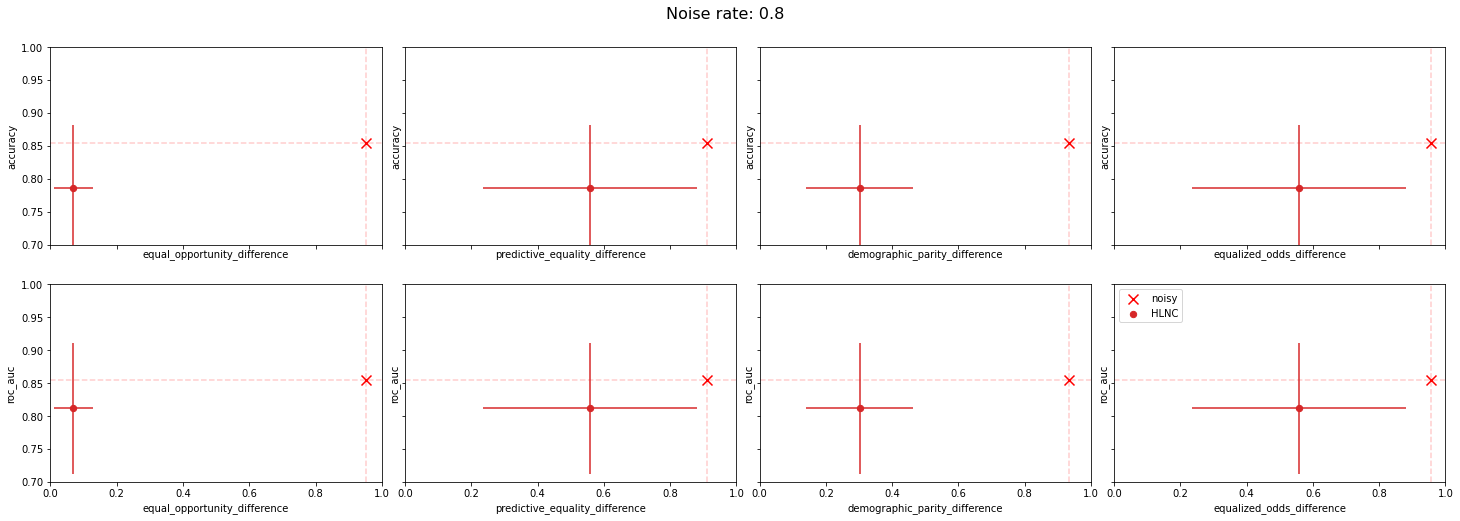

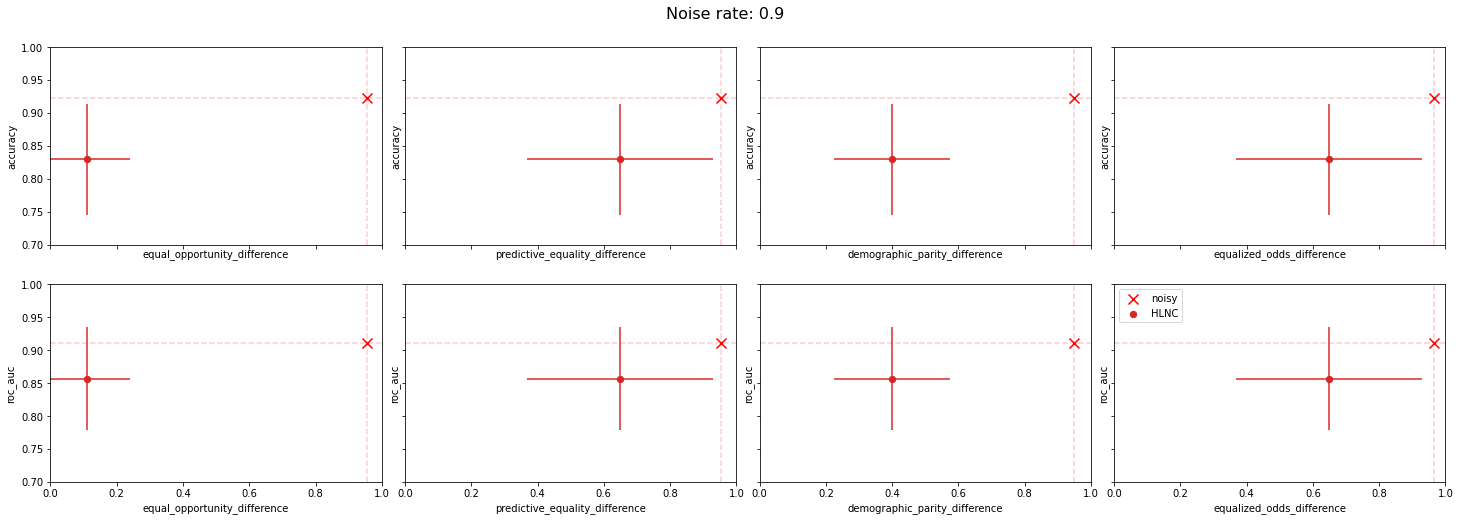

In [16]:
create_trade_off_gif('balanced_bias', 'noisy', ['HLNC'], experiments, runs, xlimit=(0, 1), ylimit=(0.7, 1))